# Correlations
Version: May 4th, 2024

---

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [16]:
sectors = pd.read_csv('data/sectors.csv')
commitments = pd.read_csv('data/commitments.csv')

In [17]:
sectors = sectors[sectors['YEAR']!=2017]

In [18]:
companies = sectors.groupby('COMPANY NAME').median(numeric_only=True).reset_index().drop(columns='YEAR').drop(columns='COMPANY SIZE')

Calculate correlation coefficients according to Kendall Tau because this method is preferred in the case of small sample sizes or the presence of outliers 

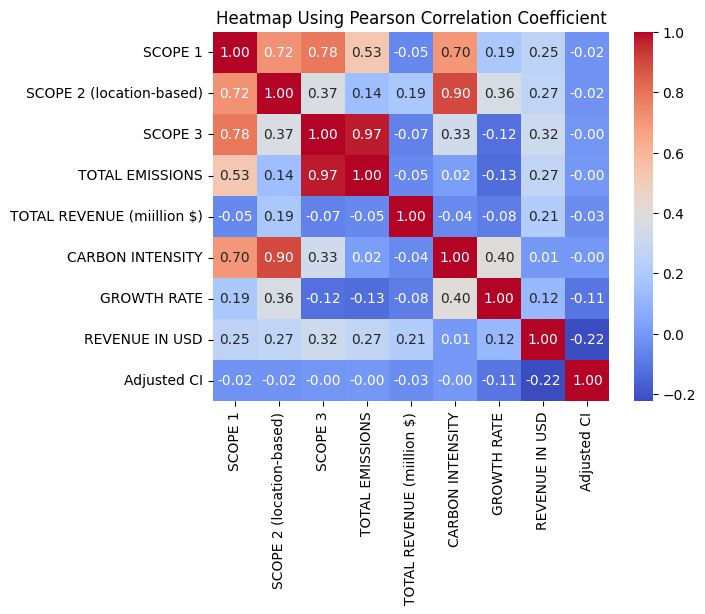

In [19]:
corr = companies.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Using Pearson Correlation Coefficient')
plt.show();


## Sectors Merged with Commitments

In [20]:
sectors

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 2 (market-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,GROWTH RATE,COMPANY SIZE,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,2059760,24431839.0,30516104.0,54619.0,USD,111.390,Belgium,True,NaN,NaN,Food & Agriculture,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,1761444,26484447.0,32301059.0,52329.0,USD,111.150,Belgium,True,-4.19,NaN,Food & Agriculture,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,1633815,23652933.0,28962596.0,46881.0,USD,113.260,Belgium,True,-10.41,NaN,Food & Agriculture,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,1456823,26527444.0,31725330.0,54304.0,USD,95.720,Belgium,True,15.83,NaN,Food & Agriculture,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,826257,24136111.0,29009205.0,57786.0,USD,84.330,Belgium,True,6.41,NaN,Food & Agriculture,57786.0,84.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,TSMC,2018,2125725.0,7001655.0,6349642.0,4315604.0,19792626.0,1031000.0,TWD,8.853,Taiwan,True,NaN,NaN,Tech,30930.0,295.10
213,TSMC,2019,2071743.0,7350195.0,6697872.0,5307729.0,21427539.0,1069950.0,TWD,8.806,Taiwan,True,3.78,NaN,Tech,32098.5,293.53
214,TSMC,2020,2010692.0,8282509.0,7459856.0,5571946.0,23325003.0,1339000.0,TWD,7.687,Taiwan,True,25.15,NaN,Tech,40170.0,256.24
215,TSMC,2021,2151937.0,9196964.0,8152497.0,6127157.0,25628555.0,1587420.0,TWD,7.149,Taiwan,True,18.55,NaN,Tech,47622.6,238.31


In [21]:
# sectors.merge(commitments, on='')
cleaned_comm = commitments[['Company Name', 'Sector', 'Net Zero By X', 'RE100 By X',
       'SBTI Committed', 'SBTI Targets', 'Pledge to Adopt Low-Carbon Tech',
       'Pledge to Invest in Low-Carbon']]

In [22]:
commitments.dtypes

Company Name                        object
Sector                              object
Net Zero By X                      float64
RE100 By X                         float64
SBTI Committed                     float64
SBTI Targets                         int64
Pledge to Adopt Low-Carbon Tech     object
Pledge to Invest in Low-Carbon     float64
Supply Chain Pledge to Report      float64
Supply Chain Pledge to Reduce      float64
dtype: object

In [23]:

def percent_change(final, initial):
    result = ((final - initial)/initial)* 100
    return result

In [24]:
initial_year = sectors[sectors['YEAR']==2018]['TOTAL EMISSIONS'].values
final_year = sectors[sectors['YEAR']==2022]['TOTAL EMISSIONS'].values
percent = percent_change(final_year, initial_year)

In [25]:
percent

array([  -4.93804517,  -11.75110928,   82.29351323,  -43.16724785,
        -25.14144932,   -1.97828568,   -6.75532342,   25.13573064,
         -7.07964263,  -31.39347563,    0.        ,  -18.28976249,
         31.76374442,  -15.03818997,  424.59016393,  -25.93223465,
        -66.07748081,  181.21904762,           nan,           nan,
                 nan,   60.84353673,   56.50842385,           nan,
         48.72314439,  269.74629936,  105.94230364,           nan,
          1.59312962,   -8.87881985, 1190.74815494,           nan,
         38.78728513,   -8.08683571,    1.31101639,   71.1248931 ,
        -13.77514952,  453.80462428,   21.61436575,  187.76752111,
         50.97239245])

In [26]:
percents

,Company Name,Percent Change (2018-2022),Scope 1 Percent Change (2018-2022),Scope 2 Percent Change (2018-2022),Scope 3 Percent Change (2018-2022)
0,Alphabet,1.31,43.57,264.23,-41.09
1,Amazon,71.12,169.10,-38.59,58.39
2,Anheuser-Busch InBev,-4.94,-23.15,-14.86,-1.21
3,Apple,-13.78,-3.90,-65.43,-18.03
4,BMW,56.51,19.31,-22.87,59.50
5,BP,-31.39,-37.70,-61.11,-29.82
6,BYD,NaN,176.29,90.36,NaN
7,Chevron,0.00,-19.70,33.33,1.08
8,Daimler/Mercedes,48.72,-54.37,-33.55,55.14
9,Danone,-11.75,-11.61,-20.50,-10.12


In [28]:
percents.columns

Index(['COMPANY NAME', 'SECTOR', 'PERCENT CHANGE', 'SCOPE 1 PERCENT CHANGE',
       'SCOPE 2 PERCENT CHANGE', 'SCOPE 3 PERCENT CHANGE',
       'CI PERCENT CHANGE'],
      dtype='object')

In [36]:
percents = pd.read_csv('data/percentchanges.csv')
percents_df = percents.drop(columns='SECTOR')
percents_df = percents_df.rename(columns={
    'COMPANY NAME' : 'Company Name'
})

In [37]:
merged = cleaned_comm.merge(percents_df, on='Company Name')
corr_matrix = merged.corr(method='kendall')

/var/folders/xy/l19hywx53pz7j31v4v0hrk5w0000gn/T/com.apple.messages/ipykernel_65260/3663750991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged.corr(method='kendall')


In [40]:
corr_matrix.columns

Index(['Net Zero By X', 'RE100 By X', 'SBTI Committed', 'SBTI Targets',
       'Pledge to Invest in Low-Carbon', 'PERCENT CHANGE',
       'SCOPE 1 PERCENT CHANGE', 'SCOPE 2 PERCENT CHANGE',
       'SCOPE 3 PERCENT CHANGE', 'CI PERCENT CHANGE'],
      dtype='object')

<Axes: >

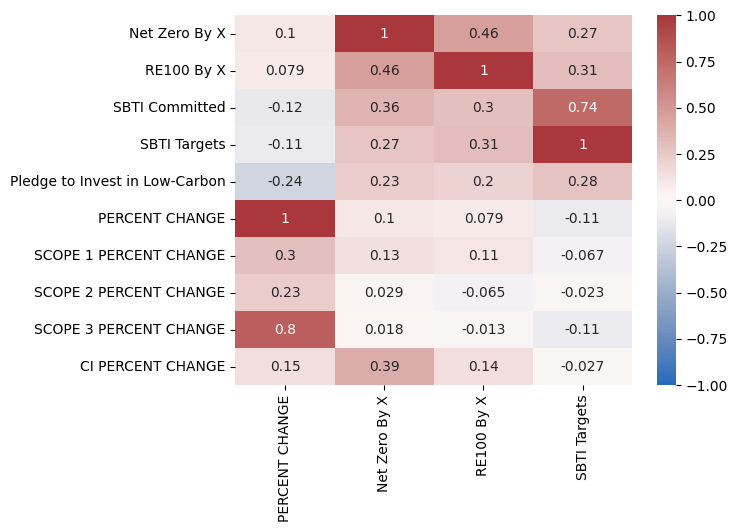

In [41]:
# handwritten example of 5x2 smaller table to sanity check kendall tau
# make sure percentages are being represented accurately
# can change cmap range (-1, 1)
submatrix  = corr_matrix[['PERCENT CHANGE', 'Net Zero By X', 'RE100 By X', 'SBTI Targets']]
sns.heatmap(submatrix, annot=True, cmap='vlag', vmin=-1, vmax=1)

In [72]:
activities = pd.read_csv('data/activities.csv', skiprows=1)
activities_df = activities.drop(columns=['Product Specific Carbon Metric (CO2/X)'])
emissions_activ = merged.merge(activities_df, on='Company Name')
percents_df.columns

Index(['Company Name', 'PERCENT CHANGE', 'SCOPE 1 PERCENT CHANGE',
       'SCOPE 2 PERCENT CHANGE', 'SCOPE 3 PERCENT CHANGE',
       'CI PERCENT CHANGE'],
      dtype='object')

In [74]:
# row indices = activities: net zero, re, sbti commitments+targets, internal price on carbon, requires suppliers to disclose carbon
# columns = percent changes: absolute, scope 1-3, CI

activties_corr = emissions_activ.corr(method='kendall', numeric_only=True).round(2)
cleaned = activties_corr[[
       'PERCENT CHANGE', 'SCOPE 1 PERCENT CHANGE',
       'SCOPE 2 PERCENT CHANGE', 'SCOPE 3 PERCENT CHANGE',
       'CI PERCENT CHANGE'
]].reset_index()

presentation_table = cleaned.iloc[[0,1,2,3,30,31],:]
presentation_table = presentation_table.rename(columns={
       'index' : 'Commitments'
})
presentation_table = presentation_table.set_index('Commitments')
presentation_table = presentation_table.rename(columns={
       'PERCENT CHANGE' : 'Total Emissions % Change (2018-2022)',
       'SCOPE 1 PERCENT CHANGE' : 'Scope 1 % Change (2018-2022)',
       'SCOPE 2 PERCENT CHANGE' : 'Scope 2 % Change (2018-2022)',
       'SCOPE 3 PERCENT CHANGE' : 'Scope 3 % Change (2018-2022)',
       'CI PERCENT CHANGE' : 'CI % Change (2018-2022)'
})
presentation_table

,Total Emissions % Change (2018-2022),Scope 1 % Change (2018-2022),Scope 2 % Change (2018-2022),Scope 3 % Change (2018-2022),CI % Change (2018-2022)
Commitments,,,,,
Net Zero By X,0.10,0.13,0.03,0.02,0.39
RE100 By X,0.08,0.11,-0.07,-0.01,0.14
SBTI Committed,-0.12,-0.01,0.01,-0.15,0.11
SBTI Targets,-0.11,-0.07,-0.02,-0.11,-0.03
Requiring Suppliers to Disclose Carbon,0.14,0.32,0.08,0.04,0.38
Requiring Suppliers to Reduce Carbon,0.04,0.10,0.03,-0.00,0.23


In [75]:
import dataframe_image as dfi
dfi.export(presentation_table, 'presentation_table.png')

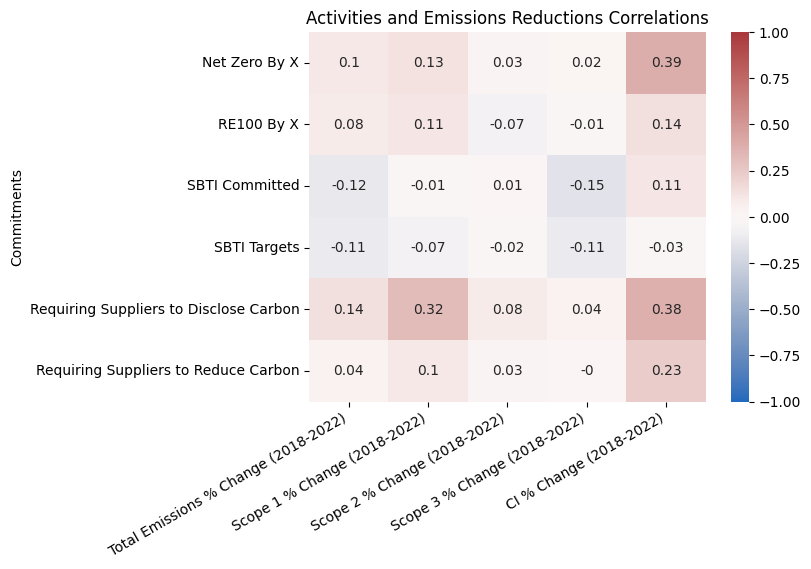

In [76]:
sns.heatmap(presentation_table, cmap='vlag', annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=30, ha='right')
plt.title('Activities and Emissions Reductions Correlations')
plt.show();

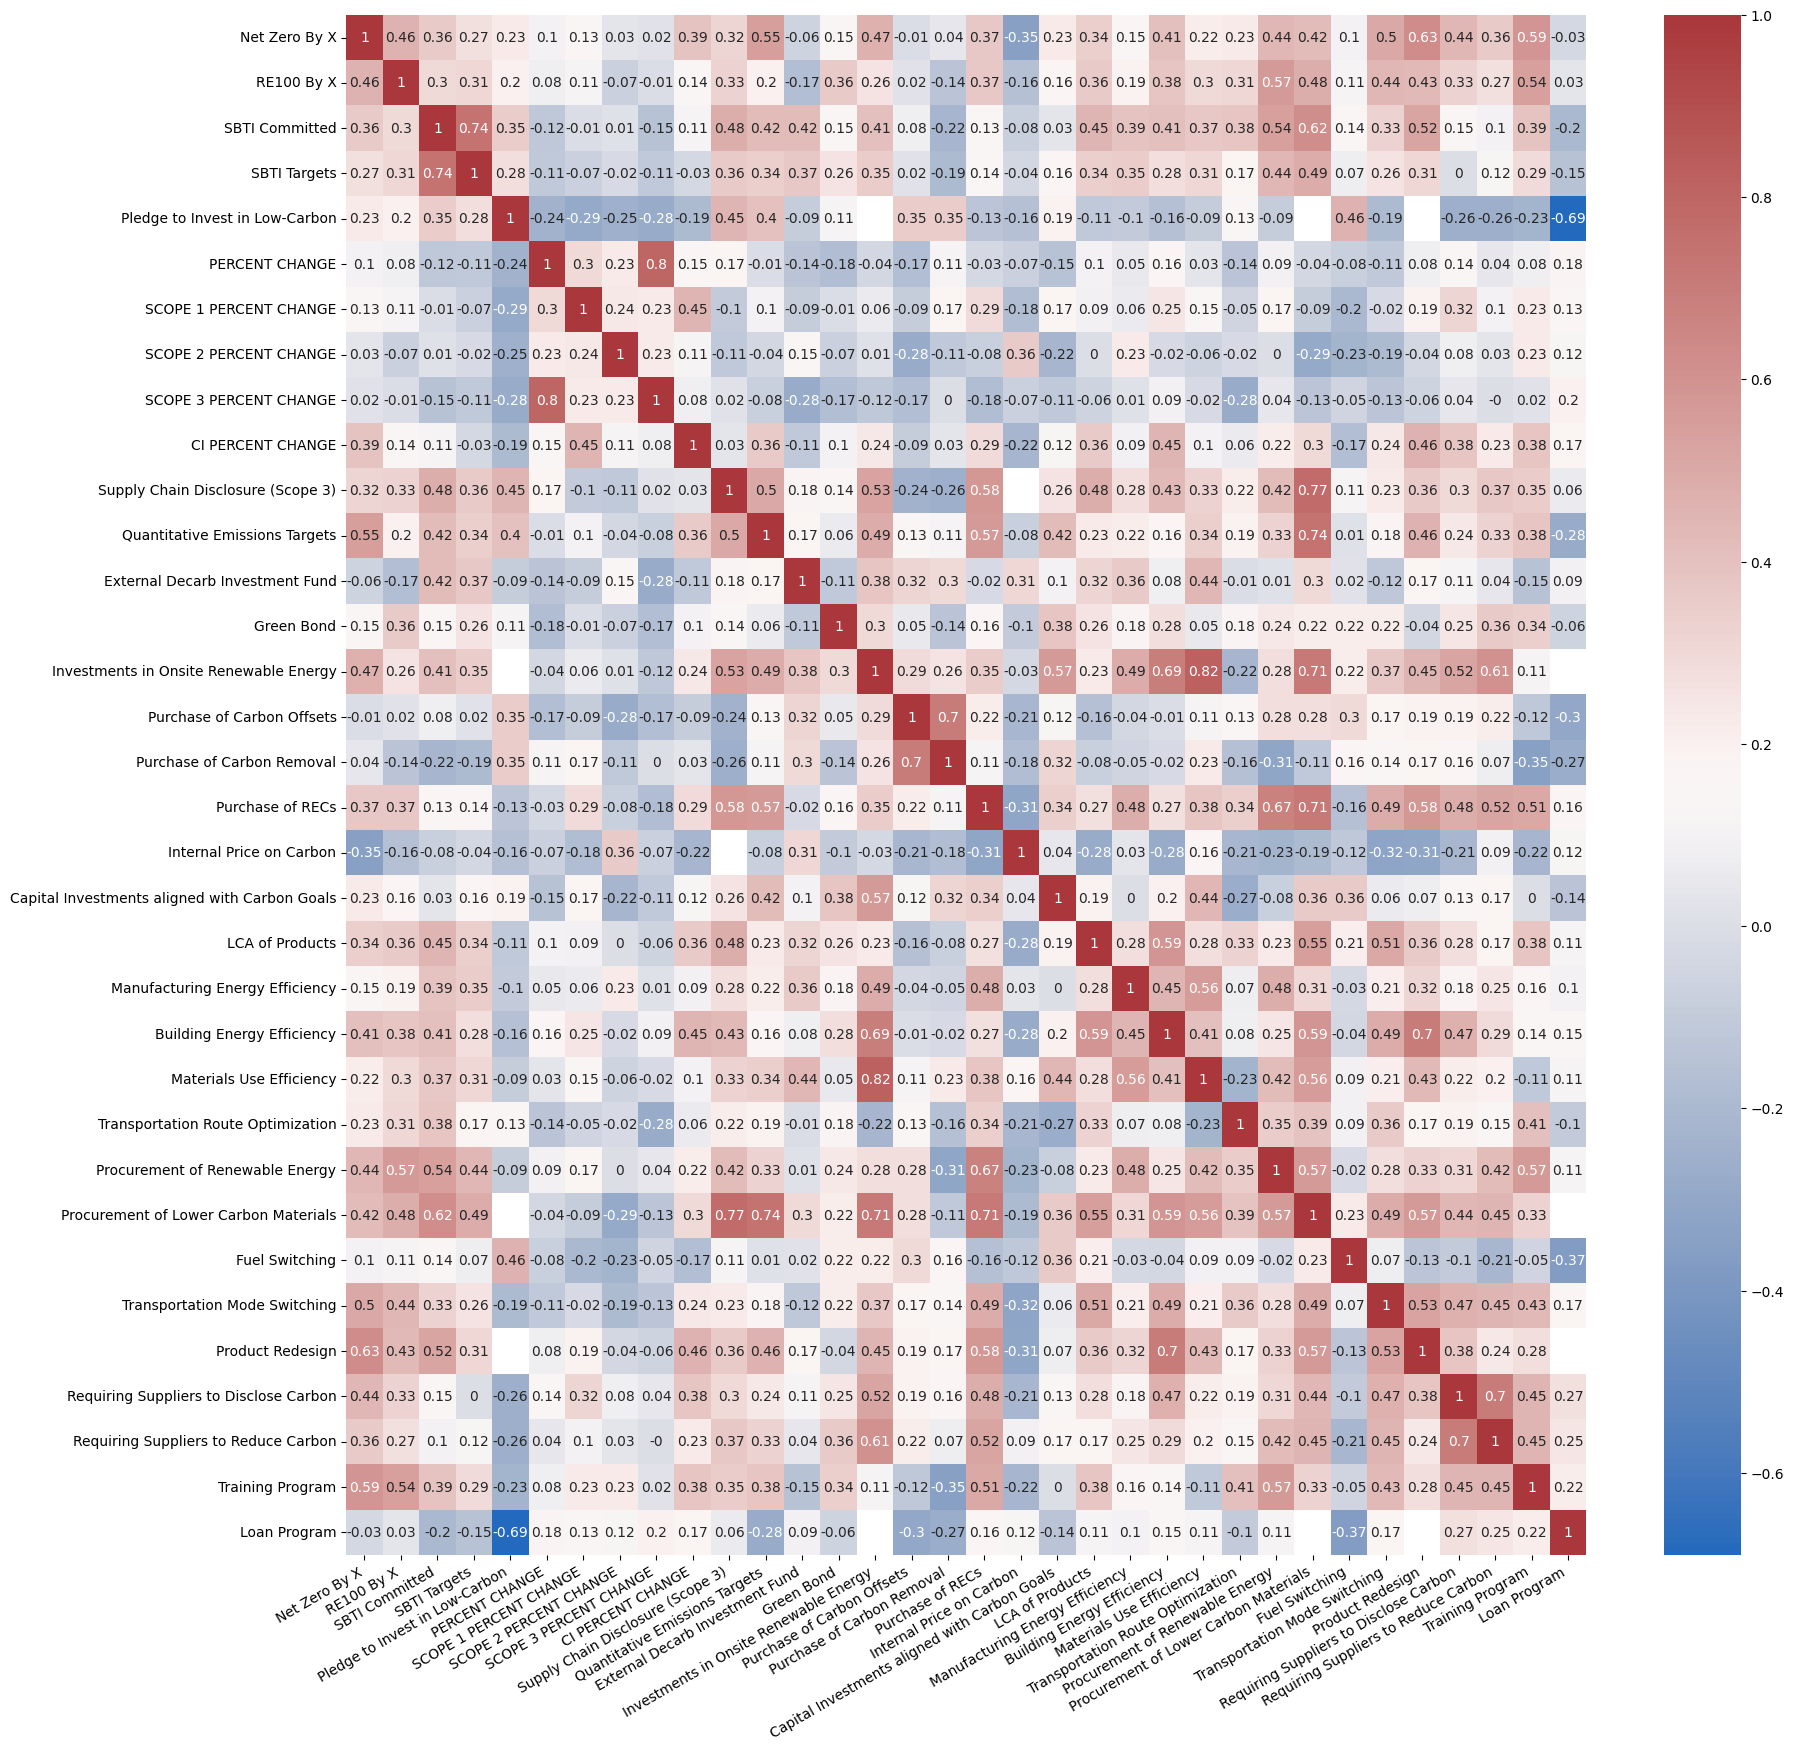

In [82]:
# color code differently to view extremes, middle is lighter color and edges darker, if care about negative or positive then use red white blue color map,
# white in the middle 
# possibly create submatrices
plt.figure(figsize=[20,20])
sns.heatmap(activties_corr, cmap='vlag', annot=True)
plt.xticks(rotation=30, ha='right')
plt.show();

In [ ]:
# strong positive association